In [1]:
from scripts.morph_aux import *

In [2]:
TRIGRAMS_FILE = "data/ngrams/filtered_n3grams.tsv"
VERIFIED_TEXT_WORDS_FILE = "data/verified_texts/words.csv"
VERIFIED_TEXT_DISAMED_FILE = "data/verified_texts/disamed.csv"

# Trigrams with central element to predict

## 100000 as train data

In [3]:
trigrams = load_ngrams(TRIGRAMS_FILE)

In [4]:
data = [(row[0] + row[2], row[1]) for row in trigrams]

import random
random.shuffle(data)

test31 = data[:len(data)/10]
train31 = data[len(data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train31), len(test31)))

Train set length: 515202
Test set length: 57244


In [5]:
train311 = train31[:100000]
test311 = test31[:20000]

In [6]:
X311 = [row[0] for row in train311]
Y311 = [row[1] for row in train311]

In [7]:
from sklearn.neural_network import MLPClassifier
clf311 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(150), random_state=1)

clf311.fit(X311, Y311)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Test

In [8]:
err, lenX = testit(test311, clf311)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))
err, lenX = testit_with_h(test311, clf311, 2)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))
err, lenX = testit_with_h(test311, clf311, 5)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))

Accuracy:  1%
Accuracy: 17%
Accuracy: 94%


### Validation

In [9]:
validation_data = load_validation_data(VERIFIED_TEXT_DISAMED_FILE, VERIFIED_TEXT_WORDS_FILE)

In [10]:
validation_trigrams311 = []
for row in validation_data:
    validation_trigrams311.append((row[2] + row[4], row[3]))

In [11]:
err, lenX = testit_val(validation_trigrams311, clf311)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))

Accuracy: 49%


In [12]:
err, lenX, lenA = testit_val_with_h(validation_trigrams311, clf311, 1)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=1): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=1): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(validation_trigrams311, clf311, 3)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=3): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=3): %2.f%%' % (lenA * 100./lenX))
err, lenX, lenA = testit_val_with_h(validation_trigrams311, clf311, 5)
print("%s\t%s\t%s" % (err, lenX, lenA))
if lenA > 0:
    print('Accuracy (h=5): %2.f%%' % ((lenA - err) * 100./lenA))
    print('Coverage (h=5): %2.f%%' % (lenA * 100./lenX))

0	22262	155
Accuracy (h=1): 100%
Coverage (h=1):  1%
1004	22262	5576
Accuracy (h=3): 82%
Coverage (h=3): 25%
6781	22262	15902
Accuracy (h=5): 57%
Coverage (h=5): 71%


In [13]:
resA311, resC311 = acc_cover(validation_trigrams311, clf311)

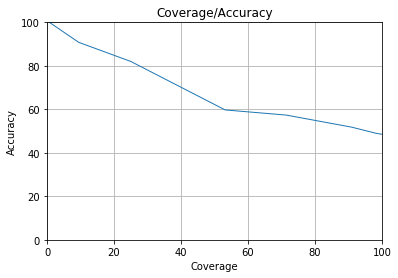

In [14]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, linewidth=1.0)
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

## 200000 train data

In [23]:
train312 = train31[:200000]
test312 = test31[:20000]

In [16]:
X312 = [row[0] for row in train312]
Y312 = [row[1] for row in train312]

In [17]:
from sklearn.neural_network import MLPClassifier
clf312 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(150), random_state=1)

clf312.fit(X312, Y312)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Test

In [18]:
err, lenX = testit(test312, clf312)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))
err, lenX = testit_with_h(test312, clf312, 2)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))
err, lenX = testit_with_h(test312, clf312, 5)
print('Accuracy: %2.f%%' % ((lenX - err) * 100./lenX))

Accuracy:  1%
Accuracy: 17%
Accuracy: 93%


In [19]:
resA312, resC312 = acc_cover(validation_trigrams311, clf312)

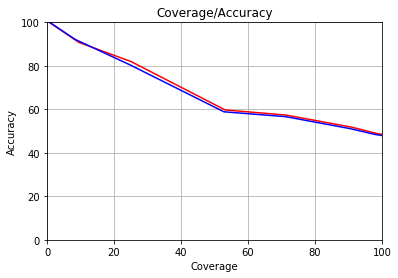

In [20]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC312, resA312, 'b-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

## 515202 train data

In [25]:
train313 = train31
test313 = test31[:20000]

In [26]:
X313 = [row[0] for row in train313]
Y313 = [row[1] for row in train313]

In [28]:
from sklearn.neural_network import MLPClassifier
clf313 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(150), random_state=1)

clf313.fit(X313, Y313)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
resA313, resC313 = acc_cover(validation_trigrams311, clf313)

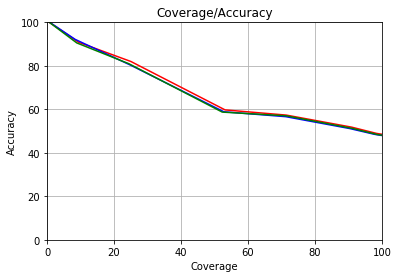

In [30]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC312, resA312, 'b-', resC313, resA313, 'g-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# Trigram with first element to predict

In [32]:
data321 = [(row[1] + row[2], row[0]) for row in trigrams]

import random
random.shuffle(data321)

test320 = data321[:len(data)/10]
train320 = data321[len(data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train320), len(test320)))

Train set length: 515202
Test set length: 57244


In [33]:
train321 = train320[:100000]
test321 = test320[:10000]

In [34]:
X321 = [row[0] for row in train321]
Y321 = [row[1] for row in train321]

In [35]:
from sklearn.neural_network import MLPClassifier
clf321 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(150), random_state=1)

clf321.fit(X321, Y321)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
validation_trigrams321 = []
for row in validation_data:
    validation_trigrams321.append((row[4] + row[5], row[3]))

In [37]:
resA321, resC321 = acc_cover(validation_trigrams321, clf321)

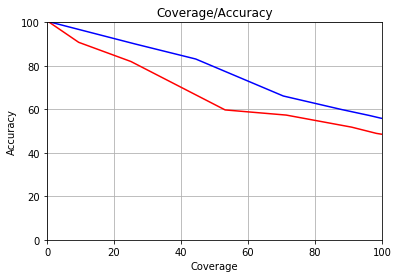

In [39]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC321, resA321, 'b-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# Trigram with last element to predict

In [52]:
data322 = [(row[0] + row[1], row[2]) for row in trigrams]

import random
random.shuffle(data321)

test320 = data322[:len(data)/10]
train320 = data322[len(data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train320), len(test320)))

Train set length: 515202
Test set length: 57244


In [53]:
train322 = train320[:100000]
test322 = test320[:10000]

In [54]:
X322 = [row[0] for row in train322]
Y322 = [row[1] for row in train322]

In [55]:
from sklearn.neural_network import MLPClassifier
clf322 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(150), random_state=1)

clf322.fit(X322, Y322)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [56]:
validation_trigrams322 = []
for row in validation_data:
    validation_trigrams322.append((row[1] + row[2], row[3]))

In [57]:
resA322, resC322 = acc_cover(validation_trigrams322, clf322)

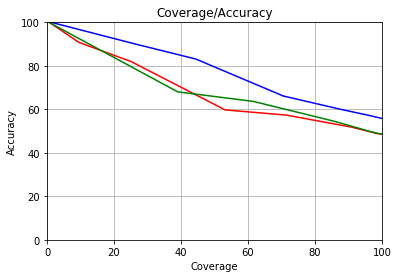

In [58]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC321, resA321, 'b-', resC322, resA322, 'g-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# 4grams

In [50]:
N4GRAMS_FILE = "data/ngrams/filtered_n4grams1.tsv"

In [51]:
n4grams = load_ngrams(N4GRAMS_FILE)

In [59]:
data411 = [(row[0] + row[2] + row[3], row[1]) for row in n4grams]

import random
random.shuffle(data411)

test411 = data411[:len(data411)/10]
train411 = data411[len(data411)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train411), len(test411)))

Train set length: 361550
Test set length: 40172


In [60]:
train411 = train411[:200000]
test411 = test411[:20000]

In [61]:
X411 = [row[0] for row in train411]
Y411 = [row[1] for row in train411]

In [62]:
from sklearn.neural_network import MLPClassifier
clf411 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                       hidden_layer_sizes=(200), random_state=1)

clf411.fit(X411, Y411)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [63]:
validation_trigrams411 = []
for row in validation_data:
    validation_trigrams411.append((row[2] + row[4] + row[5], row[3]))

In [64]:
resA411, resC411 = acc_cover(validation_trigrams411, clf411)

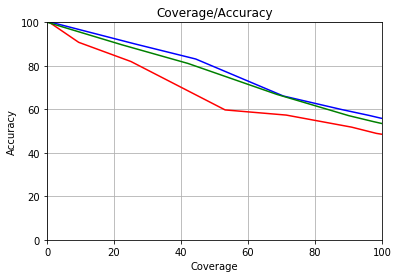

In [65]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC321, resA321, 'b-', resC411, resA411, 'g-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# 5Grams

In [66]:
N5GRAMS_FILE = "data/ngrams/filtered_n5grams.tsv"

In [67]:
n5grams =  load_ngrams(N5GRAMS_FILE)
print(len(n5grams))

340618


In [68]:
n5grams_data = [(row[0] + row[1] + row[3] + row[4], row[2]) for row in n5grams]

import random
random.shuffle(n5grams_data)

test511 = n5grams_data[:len(n5grams_data)/10]
train511 = n5grams_data[len(n5grams_data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train511), len(test511)))

Train set length: 306557
Test set length: 34061


In [69]:
X = [row[0] for row in train511]
Y = [row[1] for row in train511]

In [70]:
from sklearn.neural_network import MLPClassifier
clf511 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(220), random_state=1)

clf511.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=220, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [72]:
validation_ngrams511 = []
for row in validation_data:
    validation_ngrams511.append((row[1] + row[2] + row[4] + row[5], row[3]))

In [73]:
resA511, resC511 = acc_cover(validation_ngrams511, clf511)

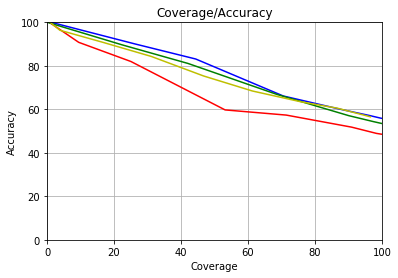

In [74]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC311, resA311, 'r-', resC321, resA321, 'b-', resC411, resA411, 'g-', resC511, resA511, 'y-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()

# 6Grams

In [75]:
N6GRAMS_FILE = "data/ngrams/filtered_n6grams1.tsv"

In [76]:
n6grams =  load_ngrams(N6GRAMS_FILE)
print(len(n6grams))

194542


In [77]:
n6grams_data = [(row[0] + row[1] + row[3] + row[4] + row[5], row[2]) for row in n6grams]

import random
random.shuffle(n5grams_data)

test61 = n6grams_data[:len(n6grams_data)/10]
train61 = n6grams_data[len(n6grams_data)/10:]
print("Train set length: %s\nTest set length: %s" % (len(train61), len(test61)))

Train set length: 175088
Test set length: 19454


In [78]:
X = [row[0] for row in train61]
Y = [row[1] for row in train61]

In [79]:
from sklearn.neural_network import MLPClassifier
clf61 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(220, 53), random_state=1)

clf61.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(220, 53), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [80]:
validation_ngrams61 = []
for row in validation_data:
    validation_ngrams61.append((row[1] + row[2] + row[4] + row[5] + row[6], row[3]))

In [81]:
resA61, resC61 = acc_cover(validation_ngrams61, clf61)

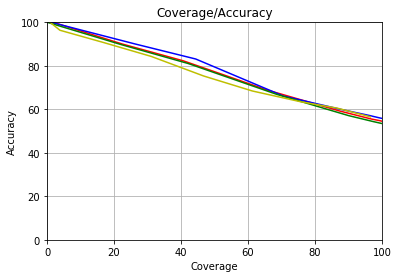

In [82]:
import matplotlib.pyplot as plt

plt.xlabel('Coverage')
plt.ylabel('Accuracy')
plt.title('Coverage/Accuracy')
plt.plot(resC61, resA61, 'r-', resC321, resA321, 'b-', resC411, resA411, 'g-', resC511, resA511, 'y-')
plt.axis([0, 100, 0, 100])
plt.grid(True)
plt.show()